In [29]:
import matplotlib
import matplotlib.pyplot as plt

from skimage import data, io
from skimage.filters import try_all_threshold

# Test Image

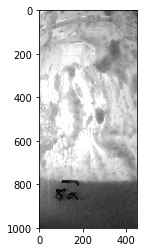

In [19]:
img = io.imread('2018-05-31 Levain Timelapse/2018-05-31_15-07-13_(0).jpg', 
                as_grey=True)

img = img[0:1000, 650:1100]
plt.imshow(img, cmap='gray')

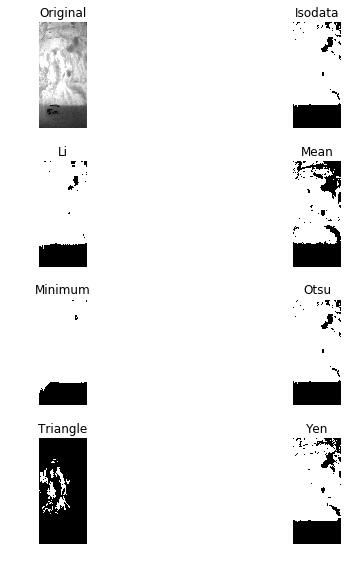

In [20]:
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

Looks like Yen threshold is the best so far.
## Yen Threshold

In [21]:
from skimage.filters import threshold_yen

Text(0.5,1,'Result')

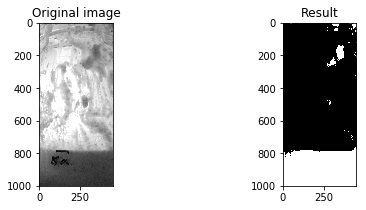

In [36]:
thresh = threshold_yen(img, nbins=5)
binary = img < thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

## Measure Region Props

In [23]:
from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate

763


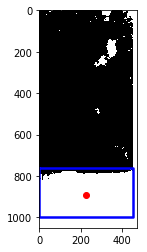

In [49]:
label_img = label(binary)
regions = regionprops(label_img)

fig, ax = plt.subplots()
ax.imshow(binary, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    
    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    
    area = (maxc-minc)*(maxr-minr)
    
    if area >= 40000:
        ax.plot(bx, by, '-b', linewidth=2.5)
        ax.plot(x0, y0, 'ro')
        print(minr)

# ax.axis((0, 600, 600, 0))
plt.show()

## Automated Analysis

In [4]:
%load_ext autoreload

%autoreload 2

import timelapse_analysis as ta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


758
1000 450


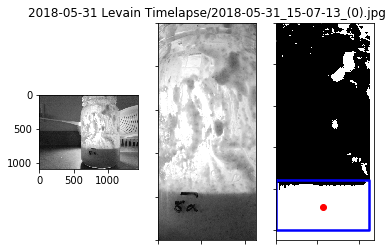

In [54]:
ta.test_image('2018-05-31 Levain Timelapse/2018-05-31_15-07-13_(0).jpg', crop_area=[0, 1000, 650, 1100]);

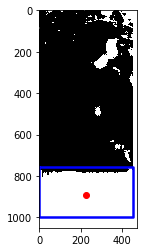

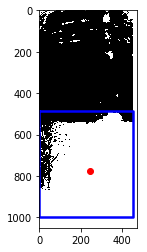

242 1000


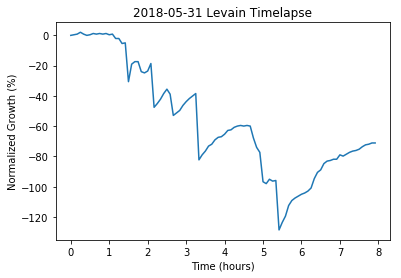

In [68]:
df_531 = ta.analyze_image('2018-05-31 Levain Timelapse')

509
1000 450


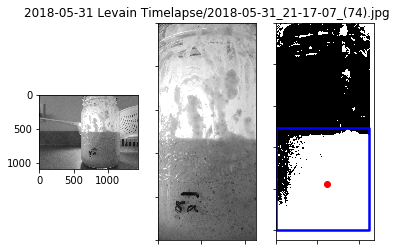

In [62]:
ta.test_image('2018-05-31 Levain Timelapse/2018-05-31_21-17-07_(74).jpg', crop_area=[0, 1000, 650, 1100]);

Height:  586
1000 450


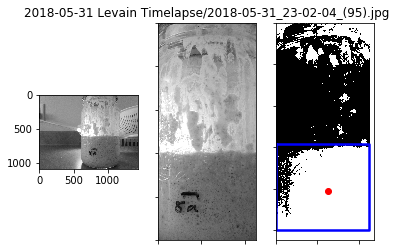

In [67]:
ta.test_image('2018-05-31 Levain Timelapse/2018-05-31_23-02-04_(95).jpg', crop_area=[0, 1000, 650, 1100], min_area=40000);

In [69]:
df_531

,File,Height,Time,Height Normalized
0,2018-05-31 Levain Timelapse\2018-05-31_15-07-1...,758,0,0.000000
1,2018-05-31 Levain Timelapse\2018-05-31_15-12-1...,759,5,0.004132
2,2018-05-31 Levain Timelapse\2018-05-31_15-17-1...,760,10,0.008264
3,2018-05-31 Levain Timelapse\2018-05-31_15-22-1...,763,15,0.020661
4,2018-05-31 Levain Timelapse\2018-05-31_15-27-1...,760,20,0.008264
5,2018-05-31 Levain Timelapse\2018-05-31_15-32-1...,758,25,0.000000
6,2018-05-31 Levain Timelapse\2018-05-31_15-37-1...,759,30,0.004132
7,2018-05-31 Levain Timelapse\2018-05-31_15-42-1...,761,35,0.012397
8,2018-05-31 Levain Timelapse\2018-05-31_15-47-1...,760,40,0.008264
9,2018-05-31 Levain Timelapse\2018-05-31_15-52-1...,761,45,0.012397


# 2018-05-31 Levain Timelapse 2

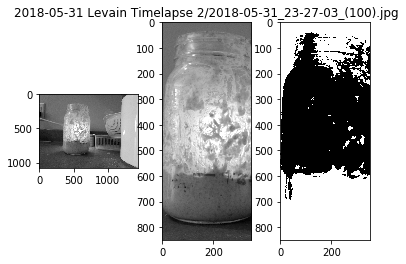

In [6]:
ta.load_image('2018-05-31 Levain Timelapse 2/2018-05-31_23-27-03_(100).jpg', crop_area=[100, 950, 350, 700], show_img=True);

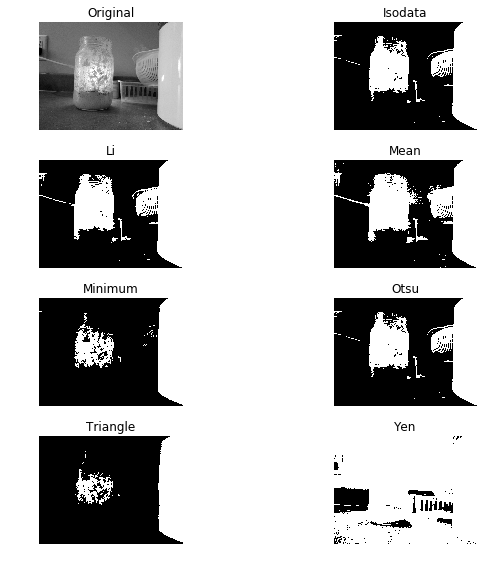

In [73]:
img = io.imread('2018-05-31 Levain Timelapse 2/2018-05-31_23-27-03_(100).jpg', as_grey=True)
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

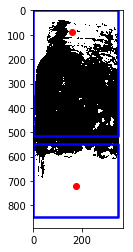

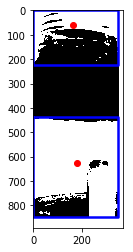

301 850


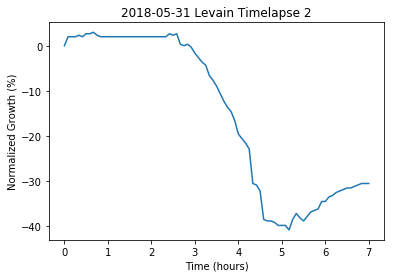

In [70]:
df = ta.analyze_image('2018-05-31 Levain Timelapse 2', crop_area=[100, 950, 350, 700])

# 2018-05-29 Levain Timelapse
## Left Jar

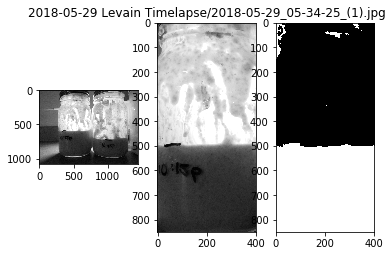

In [30]:
ta.load_image('2018-05-29 Levain Timelapse/2018-05-29_05-34-25_(1).jpg', crop_area=[100, 950, 300, 700], show_img=True);

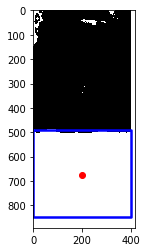

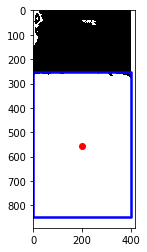

361 850


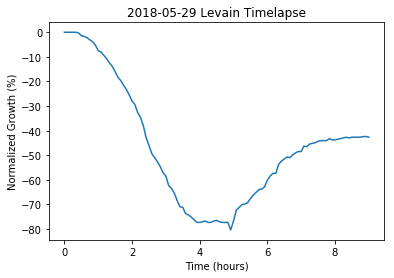

In [71]:
df_529left = ta.analyze_image('2018-05-29 Levain Timelapse', crop_area=[100, 950, 300, 700])

## Right Jar

537
850 520


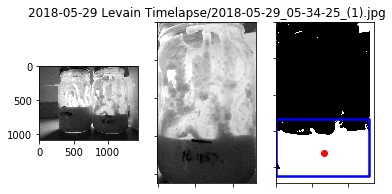

In [32]:
ta.test_image('2018-05-29 Levain Timelapse/2018-05-29_05-34-25_(1).jpg', crop_area=[100, 950, 780, 1300]);

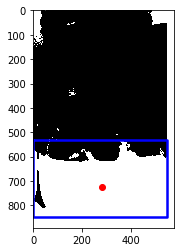

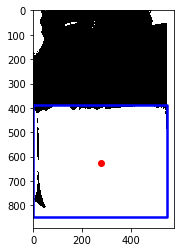

317 850


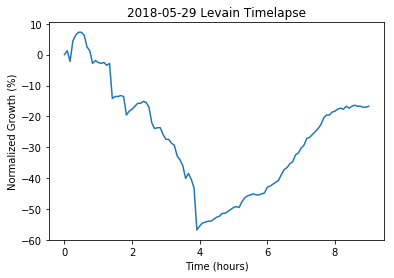

In [72]:
df_529 = ta.analyze_image('2018-05-29 Levain Timelapse', crop_area=[100, 950, 750, 1300])

537
850 520


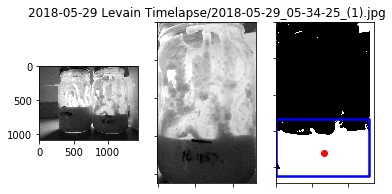

In [31]:
ta.test_image('2018-05-29 Levain Timelapse/2018-05-29_05-34-25_(1).jpg', crop_area=[100, 950, 780, 1300], min_area=10000);

362


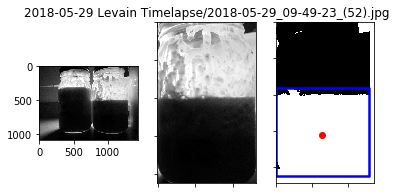

In [24]:
ta.test_image('2018-05-29 Levain Timelapse/2018-05-29_09-49-23_(52).jpg', crop_area=[100, 950, 780, 1300], min_area=10000);

# Comparison

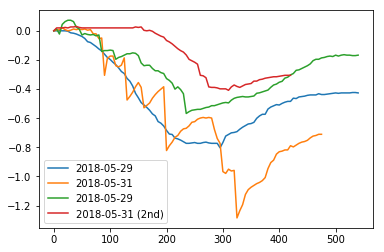

In [75]:
plt.plot(df_529left['Time'], df_529left['Height Normalized'], label='2018-05-29')
plt.plot(df_531['Time'], df_531['Height Normalized'], label='2018-05-31')
plt.plot(df_529['Time'], df_529['Height Normalized'], label='2018-05-29')
plt.plot(df['Time'], df['Height Normalized'], label='2018-05-31 (2nd)')

plt.legend()